# USE OF MACHINE LEARNING ALGORITHM

In [1]:
! pip install pmdarima

In [2]:
! pip install keras

In [3]:
! pip install tensorflow

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import keras
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")


In [5]:
final = pd.read_csv("finaldfdata.csv")
print(final.shape)
final.head()

(826, 24)


,day,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,housecount,TotEnergyPerDay,AvgEnergyPerDay,month,date
0,2011-11-23,10.36,229.0,6.29,0.36,2.04,1027.12,10.36,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94,0,13,90.385000,6.952692,11,23
1,2011-11-24,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97,0,25,213.412000,8.536480,11,24
2,2011-11-25,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01,0,32,303.993000,9.499781,11,25
3,2011-11-26,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05,1,41,420.976000,10.267707,11,26
4,2011-11-27,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08,1,41,444.883001,10.850805,11,27


In [6]:
final.tail()

,day,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,housecount,TotEnergyPerDay,AvgEnergyPerDay,month,date
821,2014-02-24,14.23,183.0,6.03,0.50,5.02,1005.19,14.23,13.00,0.74,4.78,14.23,1.0,8.25,7.99,14.23,5.52,0.82,0,4994,51994.547004,10.411403,2,24
822,2014-02-25,11.43,202.0,5.06,0.62,5.69,1000.65,10.31,12.09,0.78,1.67,11.43,1.0,4.17,6.79,10.31,3.89,0.86,0,4995,51423.508001,10.294997,2,25
823,2014-02-26,11.29,227.0,2.74,0.26,3.82,1012.73,11.29,13.00,0.73,3.03,11.29,2.0,6.01,4.17,11.29,1.67,0.90,0,4993,50943.305995,10.202945,2,26
824,2014-02-27,10.31,224.0,3.08,0.32,4.14,1007.02,10.31,12.04,0.74,0.82,10.31,2.0,3.43,3.93,10.31,1.41,0.93,0,4990,51678.185998,10.356350,2,27
825,2014-02-28,7.35,61.0,3.11,0.67,2.24,998.92,4.51,10.80,0.86,0.76,4.51,1.0,3.05,3.43,7.35,0.82,0.97,0,4987,1042.266000,0.208997,2,28


In [7]:
final.rename(columns = {"AvgEnergyPerDay":"avg_energy"}, inplace=True)

No handles with labels found to put in legend.


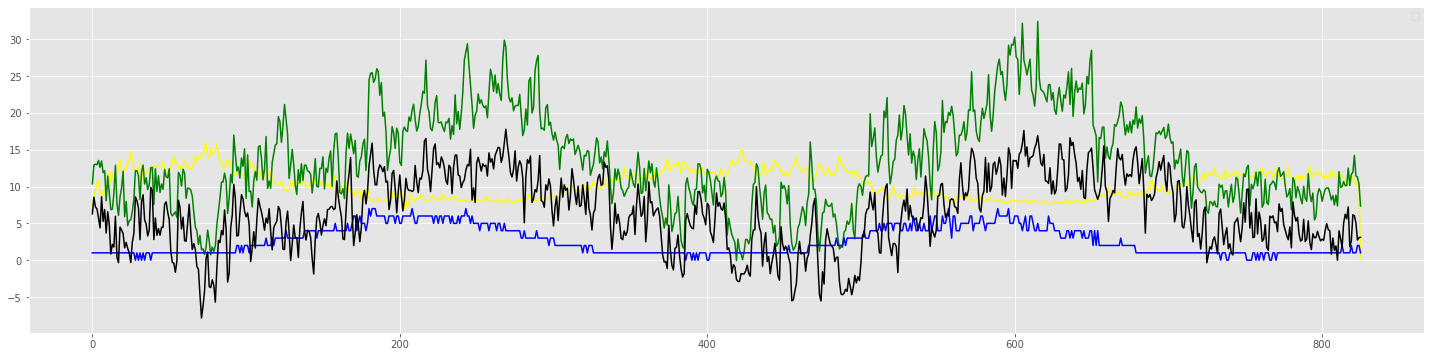

In [8]:
fig, ax1 = plt.subplots(figsize=(25, 6))
ax1.plot( final["avg_energy"], color="yellow")
ax1.plot( final["temperatureMax"],  color="green")
ax1.plot(final["uvIndex"], color="blue")
ax1.plot(final["dewPoint"], "black")
ax1.legend()
plt.show()

In [9]:
final.corr()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,housecount,TotEnergyPerDay,avg_energy,month,date
temperatureMax,1.000000,0.062938,0.865398,-0.333338,-0.153419,0.118296,0.986215,0.261321,-0.407432,0.894766,0.989692,0.697667,0.882628,0.896155,0.997840,0.911266,0.005095,-0.021732,0.165110,-0.186165,-0.843424,0.224715,0.055713
windBearing,0.062938,1.000000,0.091580,-0.084071,0.073574,-0.009124,0.072030,0.259255,0.020292,0.048479,0.073866,-0.090742,0.050323,0.063953,0.058382,0.052828,0.034956,0.009395,-0.091325,-0.107884,-0.012355,0.168934,0.001561
dewPoint,0.865398,0.091580,1.000000,-0.025872,-0.092031,-0.027515,0.870629,0.043651,0.052355,0.896029,0.874470,0.488662,0.893817,0.938801,0.862303,0.940476,-0.007559,-0.032419,0.177616,-0.133423,-0.753515,0.328262,0.057964
cloudCover,-0.333338,-0.084071,-0.025872,1.000000,0.169220,-0.098619,-0.309840,-0.332863,0.480576,-0.139323,-0.305784,-0.248785,-0.107683,-0.062109,-0.335212,-0.102976,-0.064122,-0.039599,0.018313,0.121185,0.240335,-0.108178,0.008256
windSpeed,-0.153419,0.073574,-0.092031,0.169220,1.000000,-0.343990,-0.186159,0.280734,-0.041754,-0.145647,-0.173435,-0.152741,-0.071692,-0.022087,-0.161839,-0.132297,-0.024524,0.009564,-0.023696,0.043832,0.148024,-0.040743,0.046538
pressure,0.118296,-0.009124,-0.027515,-0.098619,-0.343990,1.000000,0.138683,-0.009767,-0.251057,0.100185,0.125127,0.100526,0.060187,0.007557,0.129552,0.058901,0.041789,0.008527,-0.222377,-0.266573,-0.018525,-0.038424,-0.007104
apparentTemperatureHigh,0.986215,0.072030,0.870629,-0.309840,-0.186159,0.138683,1.000000,0.232933,-0.369758,0.895829,0.994968,0.685481,0.875289,0.890593,0.989490,0.914020,0.009018,-0.022878,0.143199,-0.207323,-0.843002,0.225492,0.057827
visibility,0.261321,0.259255,0.043651,-0.332863,0.280734,-0.009767,0.232933,1.000000,-0.579280,0.158672,0.232491,0.240913,0.171637,0.191860,0.260022,0.152318,0.060627,0.067585,-0.005395,-0.115072,-0.244486,0.112338,0.000805
humidity,-0.407432,0.020292,0.052355,0.480576,-0.041754,-0.251057,-0.369758,-0.579280,1.000000,-0.183016,-0.365162,-0.534200,-0.172094,-0.207155,-0.412044,-0.201027,-0.013711,-0.013943,-0.029117,0.127642,0.360290,0.152554,-0.015212
apparentTemperatureLow,0.894766,0.048479,0.896029,-0.139323,-0.145647,0.100185,0.895829,0.158672,-0.183016,1.000000,0.895763,0.604799,0.982463,0.889861,0.894459,0.908737,0.004606,-0.009078,0.187978,-0.142630,-0.792107,0.269336,0.069284


In [10]:
final['day'] = pd.to_datetime(final["day"])

In [11]:
from sklearn import preprocessing

In [12]:
pre = preprocessing.LabelEncoder()

In [13]:
pre.fit(final["day"])

LabelEncoder()

In [14]:
final["datetime"] = pre.transform(final["day"])

In [15]:
final.head()

,day,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,housecount,TotEnergyPerDay,avg_energy,month,date,datetime
0,2011-11-23,10.36,229.0,6.29,0.36,2.04,1027.12,10.36,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94,0,13,90.385000,6.952692,11,23,0
1,2011-11-24,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97,0,25,213.412000,8.536480,11,24,1
2,2011-11-25,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01,0,32,303.993000,9.499781,11,25,2
3,2011-11-26,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05,1,41,420.976000,10.267707,11,26,3
4,2011-11-27,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08,1,41,444.883001,10.850805,11,27,4


In [16]:
print("maximum date :", max(final["day"]))
print("minimum date :", min(final["day"]))

maximum date : 2014-02-28 00:00:00
minimum date : 2011-11-23 00:00:00


In [17]:
final.columns

Index(['day', 'temperatureMax', 'windBearing', 'dewPoint', 'cloudCover',
       'windSpeed', 'pressure', 'apparentTemperatureHigh', 'visibility',
       'humidity', 'apparentTemperatureLow', 'apparentTemperatureMax',
       'uvIndex', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'holiday', 'housecount',
       'TotEnergyPerDay', 'avg_energy', 'month', 'date', 'datetime'],
      dtype='object')

In [18]:
final_corr = final.corr()

# Heatmap

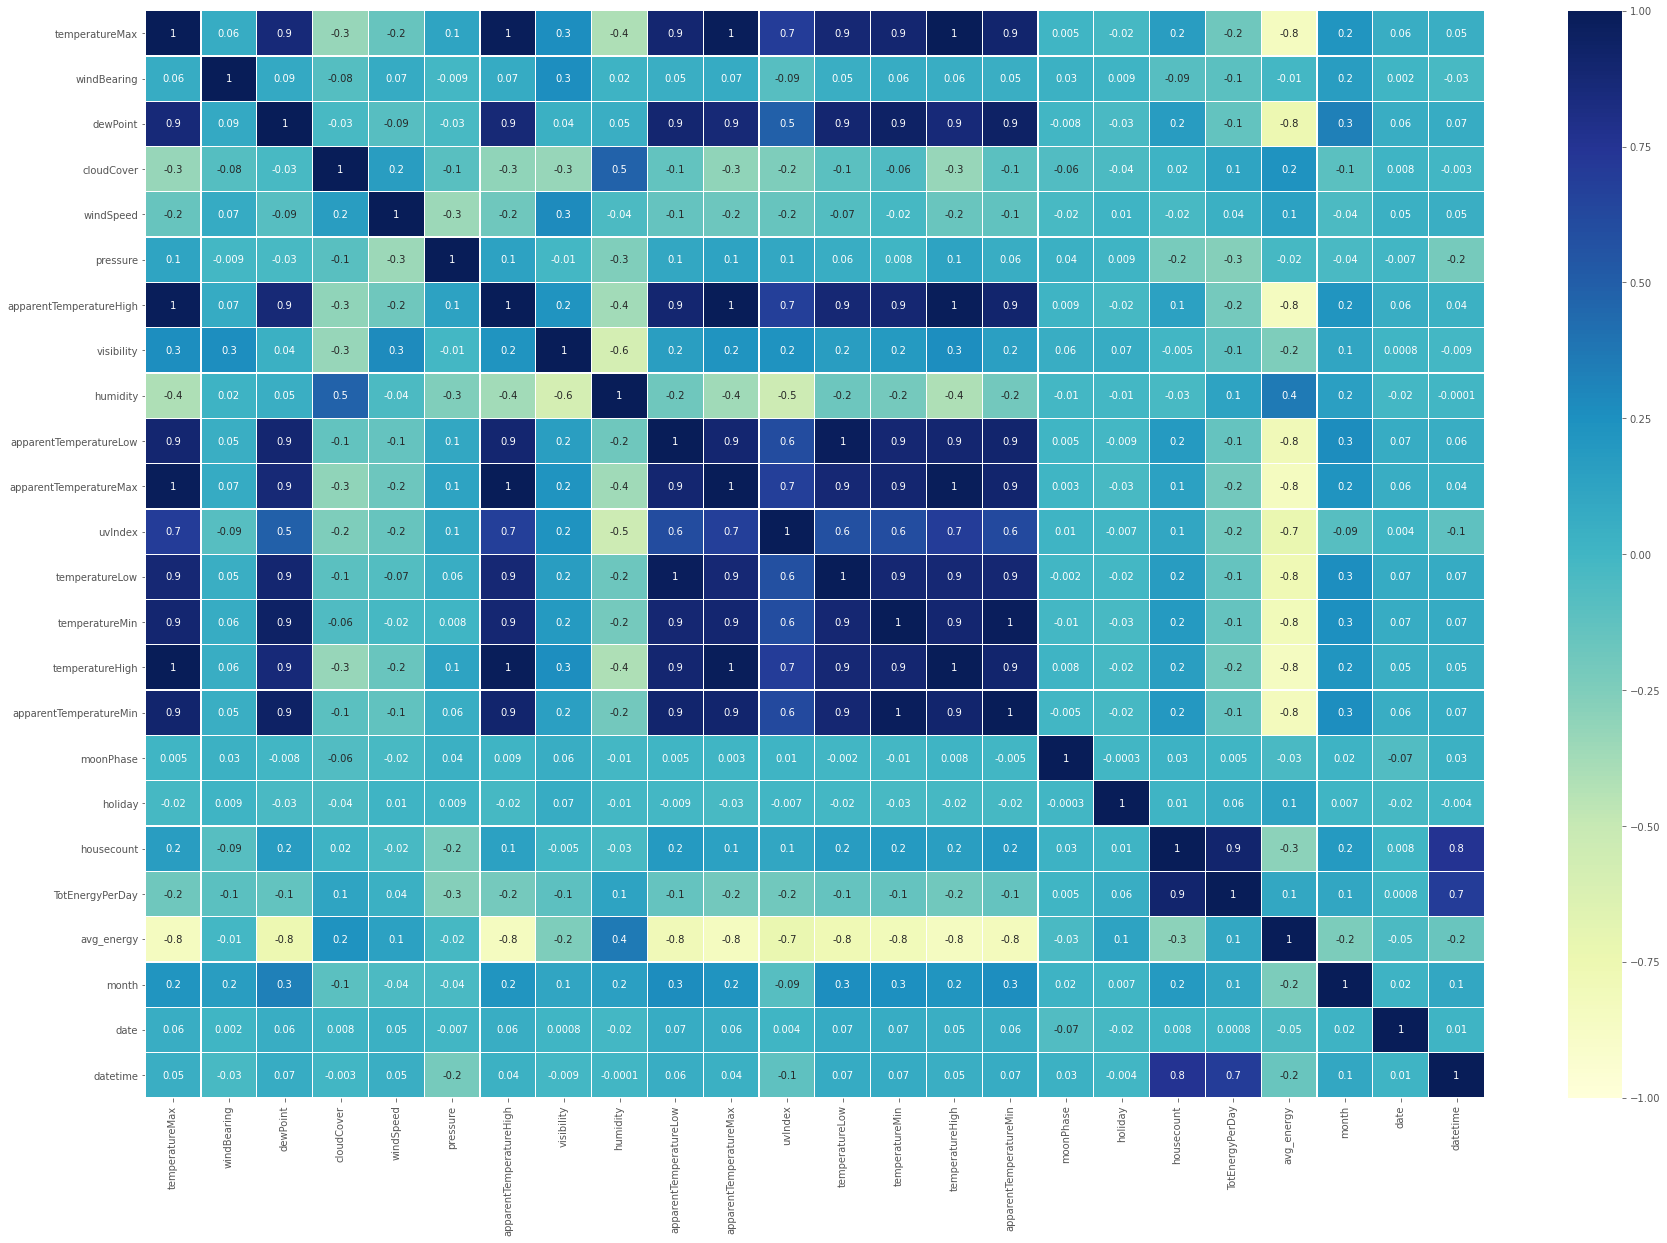

In [19]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(final_corr, cmap="YlGnBu", linewidths=0.3, annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, ax=ax)

In [20]:
final_corr.reset_index(inplace=True)

In [21]:
final_corr

,index,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,housecount,TotEnergyPerDay,avg_energy,month,date,datetime
0,temperatureMax,1.000000,0.062938,0.865398,-0.333338,-0.153419,0.118296,0.986215,0.261321,-0.407432,0.894766,0.989692,0.697667,0.882628,0.896155,0.997840,0.911266,0.005095,-0.021732,0.165110,-0.186165,-0.843424,0.224715,0.055713,0.053330
1,windBearing,0.062938,1.000000,0.091580,-0.084071,0.073574,-0.009124,0.072030,0.259255,0.020292,0.048479,0.073866,-0.090742,0.050323,0.063953,0.058382,0.052828,0.034956,0.009395,-0.091325,-0.107884,-0.012355,0.168934,0.001561,-0.026907
2,dewPoint,0.865398,0.091580,1.000000,-0.025872,-0.092031,-0.027515,0.870629,0.043651,0.052355,0.896029,0.874470,0.488662,0.893817,0.938801,0.862303,0.940476,-0.007559,-0.032419,0.177616,-0.133423,-0.753515,0.328262,0.057964,0.069664
3,cloudCover,-0.333338,-0.084071,-0.025872,1.000000,0.169220,-0.098619,-0.309840,-0.332863,0.480576,-0.139323,-0.305784,-0.248785,-0.107683,-0.062109,-0.335212,-0.102976,-0.064122,-0.039599,0.018313,0.121185,0.240335,-0.108178,0.008256,-0.003440
4,windSpeed,-0.153419,0.073574,-0.092031,0.169220,1.000000,-0.343990,-0.186159,0.280734,-0.041754,-0.145647,-0.173435,-0.152741,-0.071692,-0.022087,-0.161839,-0.132297,-0.024524,0.009564,-0.023696,0.043832,0.148024,-0.040743,0.046538,0.051416
5,pressure,0.118296,-0.009124,-0.027515,-0.098619,-0.343990,1.000000,0.138683,-0.009767,-0.251057,0.100185,0.125127,0.100526,0.060187,0.007557,0.129552,0.058901,0.041789,0.008527,-0.222377,-0.266573,-0.018525,-0.038424,-0.007104,-0.211297
6,apparentTemperatureHigh,0.986215,0.072030,0.870629,-0.309840,-0.186159,0.138683,1.000000,0.232933,-0.369758,0.895829,0.994968,0.685481,0.875289,0.890593,0.989490,0.914020,0.009018,-0.022878,0.143199,-0.207323,-0.843002,0.225492,0.057827,0.036740
7,visibility,0.261321,0.259255,0.043651,-0.332863,0.280734,-0.009767,0.232933,1.000000,-0.579280,0.158672,0.232491,0.240913,0.171637,0.191860,0.260022,0.152318,0.060627,0.067585,-0.005395,-0.115072,-0.244486,0.112338,0.000805,-0.009391
8,humidity,-0.407432,0.020292,0.052355,0.480576,-0.041754,-0.251057,-0.369758,-0.579280,1.000000,-0.183016,-0.365162,-0.534200,-0.172094,-0.207155,-0.412044,-0.201027,-0.013711,-0.013943,-0.029117,0.127642,0.360290,0.152554,-0.015212,-0.000140
9,apparentTemperatureLow,0.894766,0.048479,0.896029,-0.139323,-0.145647,0.100185,0.895829,0.158672,-0.183016,1.000000,0.895763,0.604799,0.982463,0.889861,0.894459,0.908737,0.004606,-0.009078,0.187978,-0.142630,-0.792107,0.269336,0.069284,0.061524


# Feature Selection 

In [22]:
feature_list = [j for i, j in zip(final_corr["avg_energy"], final_corr["index"]) if abs(i) > 0.3]
feature_list

['temperatureMax',
 'dewPoint',
 'apparentTemperatureHigh',
 'humidity',
 'apparentTemperatureLow',
 'apparentTemperatureMax',
 'uvIndex',
 'temperatureLow',
 'temperatureMin',
 'temperatureHigh',
 'apparentTemperatureMin',
 'avg_energy']

## Save File to csv

In [23]:
final.to_csv("final.csv", index=False)

In [24]:
final_columns = ['day','temperatureMax', 'dewPoint',
       'apparentTemperatureHigh', 'temperatureMin', 'temperatureLow', 
        'temperatureHigh', #'apparentTemperatureMin',
       'uvIndex', #'month', 'datetime' , 
       'avg_energy']

In [25]:
train = final[final["day"]<"2014-02-01"][final_columns]
test = final[final["day"]>="2014-02-01"][final_columns]
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)

# Accuracy Function

In [26]:
def accuracy_function(y, y_pred):
    yhat_lower = []
    yhat_upper = []
    y_bin = [1]*len(y)
    y_pred_bin = []
    for i in y:
        yhat_lower.append(i-0.6)
        yhat_upper.append(i+0.6)
    for i, j, k in zip(yhat_lower, yhat_upper, y_pred):
        if k< j and k>i:
            y_pred_bin.append(1)
        else:
            y_pred_bin.append(0)
    acc_score = accuracy_score(y_bin, y_pred_bin)
    return acc_score

## Initiating out_df

In [27]:
out_df = pd.DataFrame()
out_df["day"] = test["day"]
out_df.set_index("day", inplace=True)

In [28]:
out_df_final = pd.DataFrame()
#out_df_final["day"] = test["day"]
#out_df_final.set_index("day", inplace=True)

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,day,temperatureMax,dewPoint,apparentTemperatureHigh,temperatureMin,temperatureLow,temperatureHigh,uvIndex,avg_energy
0,2011-11-23,10.36,6.29,10.36,3.81,8.24,10.36,1.0,6.952692
1,2011-11-24,12.93,8.56,12.93,8.56,9.71,12.93,1.0,8.536480
2,2011-11-25,13.03,7.24,12.27,7.46,7.01,12.27,1.0,9.499781
3,2011-11-26,12.96,6.96,12.96,7.01,11.59,12.96,1.0,10.267707
4,2011-11-27,13.54,5.76,13.54,4.47,1.31,13.54,1.0,10.850805


In [31]:
train.set_index("day", inplace=True)
test.set_index("day", inplace=True)
X_train = train.drop(["avg_energy"], axis=1)
y_train = train["avg_energy"]
X_test = test.drop(["avg_energy"], axis=1)
y_test = test["avg_energy"]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((798, 7), (798,), (28, 7), (28,))

In [32]:
X_test.head(5)
#y_test.head(5)

,temperatureMax,dewPoint,apparentTemperatureHigh,temperatureMin,temperatureLow,temperatureHigh,uvIndex
day,,,,,,,
2014-02-01,9.72,3.18,4.27,4.83,6.24,8.32,1.0
2014-02-02,9.30,2.63,6.48,5.79,4.97,9.30,1.0
2014-02-03,7.99,2.86,4.59,4.97,4.22,7.99,1.0
2014-02-04,8.88,2.69,5.63,4.22,5.54,8.88,1.0
2014-02-05,9.64,4.06,5.86,5.54,7.01,9.64,1.0


### Instantiation of LinearRegression

In [33]:
lin_reg = LinearRegression(normalize=0.2)
lin_reg.fit(X_train, y_train)
y_train_pred_reg = lin_reg.predict(X_train)
y_test_pred_reg = lin_reg.predict(X_test)

In [34]:
X_train.head(5)

,temperatureMax,dewPoint,apparentTemperatureHigh,temperatureMin,temperatureLow,temperatureHigh,uvIndex
day,,,,,,,
2011-11-23,10.36,6.29,10.36,3.81,8.24,10.36,1.0
2011-11-24,12.93,8.56,12.93,8.56,9.71,12.93,1.0
2011-11-25,13.03,7.24,12.27,7.46,7.01,12.27,1.0
2011-11-26,12.96,6.96,12.96,7.01,11.59,12.96,1.0
2011-11-27,13.54,5.76,13.54,4.47,1.31,13.54,1.0


In [35]:
out_df["linear"] = y_test_pred_reg

In [36]:
out_df_final["linear"] = y_test_pred_reg

### accuracy score

In [37]:
accuracy_function(y_test, y_test_pred_reg)

0.5

### Mean Squared Error

In [38]:
trainScore = mean_squared_error(y_train, y_train_pred_reg)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_reg)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.66 MSE
Test Score: 5.51 MSE


### Mean Absolute Error

In [39]:
trainScore = mean_absolute_error(y_train, y_train_pred_reg)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_reg)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.63 MSE
Test Score: 0.95 MSE


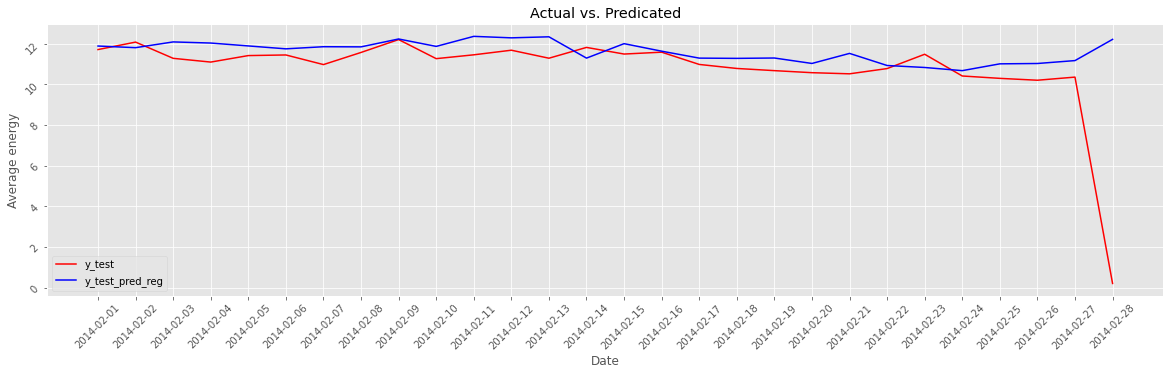

In [40]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_reg, color="blue")
ax2.legend(("y_test", "y_test_pred_reg"))
ax2.tick_params(rotation=45)

ax2.set(title='Actual vs. Predicated', xlabel='Date', ylabel='Average energy')
plt.show()

# SUPPORT VECTOR MACHINE

In [41]:
from sklearn.svm import SVR

### Instantiation of Support Vector Regressor

In [42]:
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_train_pred_svm = svm_reg.predict(X_train)
y_test_pred_svm = svm_reg.predict(X_test)

In [43]:
out_df["svm"] = y_test_pred_svm

In [44]:
out_df_final["svm"] = y_test_pred_svm

### accuracy score

In [45]:
accuracy_function(y_test, y_test_pred_svm)

0.6785714285714286

### Mean Squared Error

In [46]:
trainScore = mean_squared_error(y_train, y_train_pred_svm)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_svm)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.54 MSE
Test Score: 5.22 MSE


### Mean Absolute Error

In [47]:
trainScore = mean_absolute_error(y_train, y_train_pred_svm)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_svm)
print('Test Score: %.2f MAE' % (testScore))

Train Score: 0.52 MAE
Test Score: 0.88 MAE


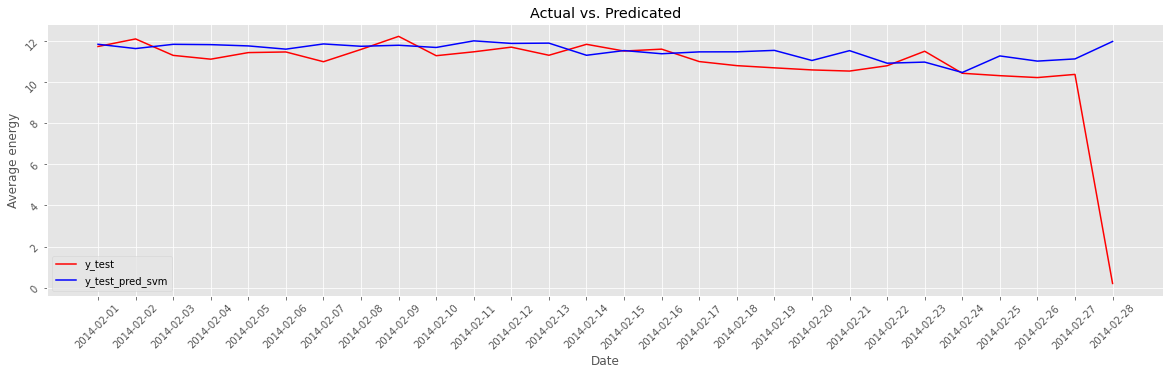

In [48]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_svm, color="blue")
ax2.legend(("y_test", "y_test_pred_svm"))
ax2.set(title='Actual vs. Predicated', xlabel='Date', ylabel='Average energy')
ax2.tick_params(rotation=45)
plt.show()

# Random Forest Tree

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

### Instantiation of Random Forest Regressor

In [50]:
ran_reg = RandomForestRegressor(random_state=2020)
ran_reg.fit(X_train, y_train)
y_test_pred_ran = ran_reg.predict(X_test)
y_train_pred_ran = ran_reg.predict(X_train)

### accuracy score

In [51]:
accuracy_function(y_test, y_test_pred_ran)

0.4642857142857143

In [52]:
trainScore = mean_squared_error(y_train, y_train_pred_ran)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_ran)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.08 MSE
Test Score: 5.65 MSE


### Mean Absolute Error

In [53]:
trainScore = mean_absolute_error(y_train, y_train_pred_ran)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_ran)
print('Test Score: %.2f MAE' % (testScore))

Train Score: 0.20 MAE
Test Score: 1.11 MAE


In [54]:
out_df["random"] = y_test_pred_ran

In [55]:
out_df_final["random"] = y_test_pred_ran

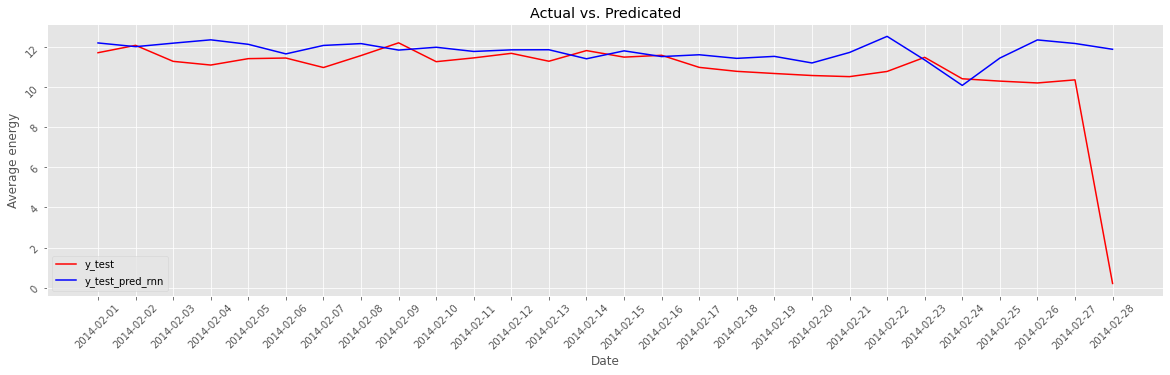

In [56]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_ran, color="blue")
ax2.legend(("y_test", "y_test_pred_rnn"))
ax2.set(title='Actual vs. Predicated', xlabel='Date', ylabel='Average energy')
ax2.tick_params(rotation=45)
plt.show()

# Apply RNN 

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [58]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test.head()

,day,temperatureMax,dewPoint,apparentTemperatureHigh,temperatureMin,temperatureLow,temperatureHigh,uvIndex,avg_energy
0,2014-02-01,9.72,3.18,4.27,4.83,6.24,8.32,1.0,11.710582
1,2014-02-02,9.30,2.63,6.48,5.79,4.97,9.30,1.0,12.078164
2,2014-02-03,7.99,2.86,4.59,4.97,4.22,7.99,1.0,11.280011
3,2014-02-04,8.88,2.69,5.63,4.22,5.54,8.88,1.0,11.095584
4,2014-02-05,9.64,4.06,5.86,5.54,7.01,9.64,1.0,11.415105


In [59]:
train.set_index("day", inplace=True)
test.set_index("day", inplace=True)

In [60]:
X_train = train.drop(["avg_energy"], axis=1).iloc[:len(train)-27,:]
X_val = train.drop("avg_energy", axis=1).iloc[len(train)-27:,:]
y_train = train["avg_energy"][:len(train)-27,]
y_val = train["avg_energy"][len(train)-27:,]
X_test = test.drop("avg_energy", axis=1)
y_test = test["avg_energy"]

In [61]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((771, 7), (771,), (27, 7), (27,), (28, 7), (28,))

In [62]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
#--------------------------------------------
X_val = np.array(X_val)
y_val = np.array(y_val)

In [63]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
#---------------------------------------------------------------------------------
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

In [64]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((771, 1, 7), (771,), (28, 1, 7), (28,))

### Normalization of X_train and X_test

In [65]:
'''X_test = tf.keras.utils.normalize(X_test, axis=1)
X_train = tf.keras.utils.normalize(X_train, axis=1)'''

'X_test = tf.keras.utils.normalize(X_test, axis=1)\nX_train = tf.keras.utils.normalize(X_train, axis=1)'

## Initialization of RNN LSTM

In [66]:
model = Sequential()

In [67]:
# design network

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units = 200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.01))
model.add(tf.keras.layers.LSTM(units = 400, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.02))
model.add(tf.keras.layers.LSTM(units = 400, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.05))
model.add(tf.keras.layers.Dense(units = 10, activation="linear"))
model.add(tf.keras.layers.Dropout(0.01))
model.add(tf.keras.layers.Dense(1, activation="linear"))
model.compile(loss='mae', optimizer='adam')
es = EarlyStopping(monitor='mae', mode=100, verbose=4)
fit = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), callbacks=[es])


Epoch 1/500
25/25 [==============================] - 8s 97ms/step - loss: 7.9511 - val_loss: 3.9992
Epoch 2/500
25/25 [==============================] - 1s 36ms/step - loss: 2.4820 - val_loss: 0.7659
Epoch 3/500
25/25 [==============================] - 1s 36ms/step - loss: 1.2054 - val_loss: 0.5749
Epoch 4/500
25/25 [==============================] - 1s 37ms/step - loss: 0.8937 - val_loss: 0.7228
Epoch 5/500
25/25 [==============================] - 1s 38ms/step - loss: 0.7401 - val_loss: 0.5996
Epoch 6/500
25/25 [==============================] - 1s 37ms/step - loss: 0.7787 - val_loss: 0.5057
Epoch 7/500
25/25 [==============================] - 1s 36ms/step - loss: 0.7505 - val_loss: 0.7645
Epoch 8/500
25/25 [==============================] - 1s 38ms/step - loss: 0.7452 - val_loss: 0.5383
Epoch 9/500
25/25 [==============================] - 1s 35ms/step - loss: 0.7102 - val_loss: 0.5815
Epoch 10/500
25/25 [==============================] - 1s 36ms/step - loss: 0.6840 - val_loss: 0.5431

In [68]:
y_train_pred = model.predict(X_train)
y_train_pred_rnn = np.reshape(y_train_pred, (y_train.shape[0]))

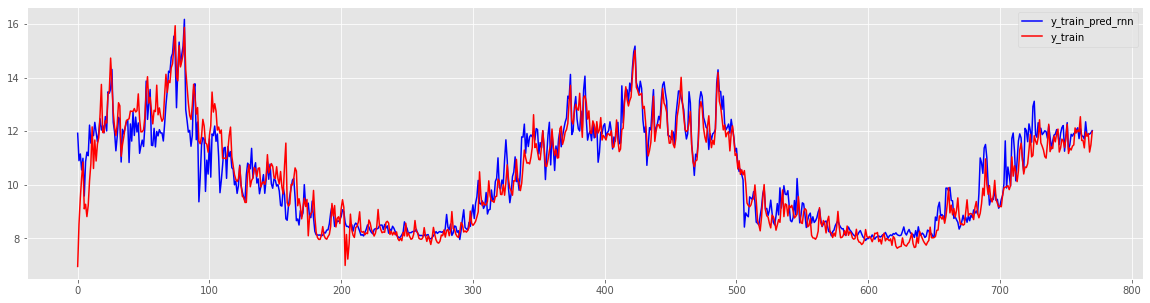

In [69]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(y_train_pred_rnn, color="blue")
ax1.plot(y_train, color="red")
ax1.legend(("y_train_pred_rnn", "y_train"))

plt.show()

In [70]:
y_test_pred = model.predict(X_test)
y_test_pred_rnn = np.reshape(y_test_pred, (y_test_pred.shape[0]))

In [71]:
out_df["rnn"] = y_test_pred_rnn

In [72]:
out_df_final["rnn"] = y_test_pred_rnn

### Accuracy Score

In [73]:
accuracy_function(y_test, y_test_pred_rnn)

0.42857142857142855

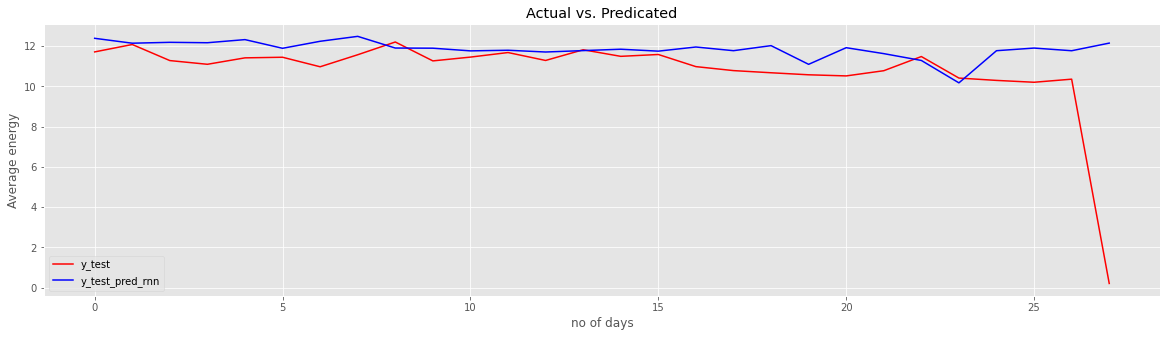

In [74]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_rnn, color="blue")
ax2.legend(("y_test", "y_test_pred_rnn"))
ax2.set(title='Actual vs. Predicated', xlabel='no of days', ylabel='Average energy')
plt.show()

### Mean Squared Error

In [75]:
trainScore = mean_squared_error(y_train, y_train_pred_rnn)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_rnn)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.40 MSE
Test Score: 5.83 MSE


### Mean Absolute Error

In [76]:
trainScore = mean_absolute_error(y_train, y_train_pred_rnn)
print("trainScore : %.2f MAE" % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_rnn)
print("testScore : %.2f MAE" % (testScore))

trainScore : 0.44 MAE
testScore : 1.13 MAE


### Mean Absolute Percentage Error

In [77]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,y_test_pred_rnn)

210.47613087071517

# Using XGBOOST

In [78]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [79]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,day,temperatureMax,dewPoint,apparentTemperatureHigh,temperatureMin,temperatureLow,temperatureHigh,uvIndex,avg_energy
0,2011-11-23,10.36,6.29,10.36,3.81,8.24,10.36,1.0,6.952692
1,2011-11-24,12.93,8.56,12.93,8.56,9.71,12.93,1.0,8.536480
2,2011-11-25,13.03,7.24,12.27,7.46,7.01,12.27,1.0,9.499781
3,2011-11-26,12.96,6.96,12.96,7.01,11.59,12.96,1.0,10.267707
4,2011-11-27,13.54,5.76,13.54,4.47,1.31,13.54,1.0,10.850805


split data into X_train, y_train, X_test and y_test form

In [80]:
train.set_index("day", inplace=True)
test.set_index("day", inplace=True)
X_train = train.drop(["avg_energy"], axis=1).iloc[:len(train)-27,:]
X_val = train.drop("avg_energy", axis=1).iloc[len(train)-27:,:]
y_train = train["avg_energy"][:len(train)-27,]
y_val = train["avg_energy"][len(train)-27:,]
X_test = test.drop("avg_energy", axis=1)
y_test = test["avg_energy"]

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((771, 7), (28, 7), (771,), (28,), (27, 7), (27,))

##  Initialization of an XGBoost Regressor

In [82]:
xg_model = xgb.XGBRegressor(learning_rate= 0.005, max_depth= 3, n_estimators= 1000, silent=1)

In [83]:
xg_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=1, verbosity=1)

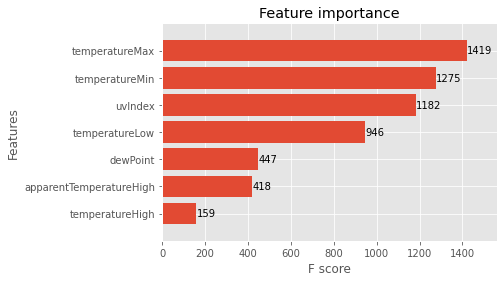

In [84]:
xgb.plot_importance(xg_model, height=0.8)

# Forecast on Test Set

In [85]:
y_train_pred_xg = xg_model.predict(X_train)

In [86]:
y_test_pred_xg = xg_model.predict(X_test)

In [87]:
out_df["xg"] = y_test_pred_xg

In [88]:
out_df_final["xg"] = y_test_pred_xg

In [89]:
accuracy_function(y_test, y_test_pred_xg)

0.4642857142857143

## Mean squared error

In [90]:
trainScore = mean_squared_error(y_train, y_train_pred_xg)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_xg)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.39 MSE
Test Score: 5.44 MSE


## Mean absolute error

In [91]:
trainScore = mean_absolute_error(y_train, y_train_pred_xg)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_xg)
print('Test Score: %.2f MAE' % (testScore))

Train Score: 0.44 MAE
Test Score: 1.02 MAE


## Mean Absolute Percentage Error

In [92]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,y_test_pred_xg)

206.4023900557728

## Actual vs Predicted

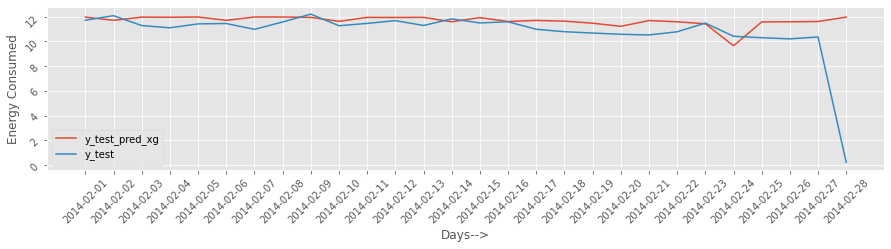

In [93]:
fig, ax1 = plt.subplots(figsize=(15,3))
ax1.plot(y_test_pred_xg, label='data')
ax1.plot(y_test, label='prediction')
ax1.set_xlabel('Days-->')
ax1.set_ylabel('Energy Consumed')
ax1.legend(("y_test_pred_xg", "y_test"))
ax1.tick_params(rotation=45)
# plt.legend()


# Gradient Boosting Regressor

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

## Initialization of GradientBoostingRegressor

In [95]:
reg = GradientBoostingRegressor(random_state=2020,learning_rate= 0.6, 
                                max_depth= 5, min_samples_leaf= 10, min_samples_split= 9, 
                                n_estimators= 50)
reg.fit(X_train,y_train)
y_train_pred_grad = reg.predict(X_train)
y_test_pred_grad = reg.predict(X_test)

In [96]:
out_df["grad"] = y_test_pred_grad

In [97]:
out_df_final["grad"] = y_test_pred_grad

### Accuracy Score

In [98]:
accuracy_function(y_test, y_test_pred_grad)

0.39285714285714285

### Mean Squared Error

In [99]:
trainScore = mean_squared_error(y_train, y_train_pred_grad)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_grad)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.05 MSE
Test Score: 5.95 MSE


### Mean Absolute Error

In [100]:
trainScore = mean_absolute_error(y_train, y_train_pred_grad)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_grad)
print('Test Score: %.2f MAE' % (testScore))

Train Score: 0.17 MAE
Test Score: 1.23 MAE


### y_test vs y_test_pred_grad

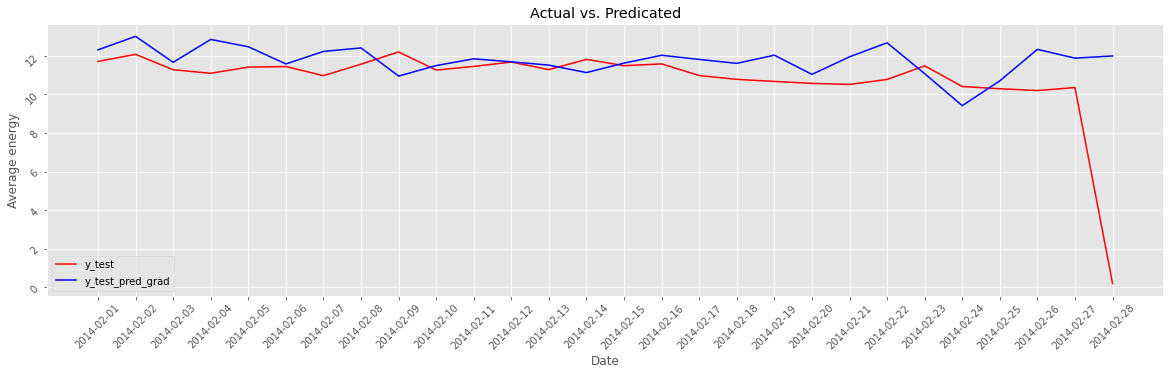

In [101]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_grad, color="blue")
ax2.legend(("y_test", "y_test_pred_grad"))
ax2.set(title='Actual vs. Predicated', xlabel='Date', ylabel='Average energy')
ax2.tick_params(rotation=45)
plt.show()

# Dickey Fuller's Test

ADF-test(Original-time-series)

For Average Energy Per Day

When Original-data is not stationary and Differenced-data is stationary,the time series is called unit root process.

For unit root process, we use ARIMA or SARIMA model. From results, we decided that Original time series is not stationary

H0 : Data is not stationary H1 : Data is stationary

If p is greater than 0.05 then data is not stationary

What is adfuller method parameter 'regression'?

’c’ : constant only (default) ’ct’ : constant and trend ’ctt’ : constant, and linear and quadratic trend ’nc’ : no constant, no trend

ADF-test(differenced-time-series)


In [102]:
import statsmodels.api as sm

In [103]:
t = sm.tsa.adfuller(final["avg_energy"], autolag='AIC',regression='ct')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -1.905926
p-value                          0.651593
#Lags Used                      21.000000
Number of Observations Used    804.000000
dtype: float64

In [104]:
final = pd.read_csv("finaldfdata.csv")
print(final.shape)
final.head()

(826, 24)


,day,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,housecount,TotEnergyPerDay,AvgEnergyPerDay,month,date
0,2011-11-23,10.36,229.0,6.29,0.36,2.04,1027.12,10.36,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94,0,13,90.385000,6.952692,11,23
1,2011-11-24,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97,0,25,213.412000,8.536480,11,24
2,2011-11-25,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01,0,32,303.993000,9.499781,11,25
3,2011-11-26,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05,1,41,420.976000,10.267707,11,26
4,2011-11-27,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08,1,41,444.883001,10.850805,11,27


In [105]:
final.rename(columns = {"AvgEnergyPerDay":"avg_energy"}, inplace=True)

In [106]:
final["day"] = pd.to_datetime(final["day"])
final.set_index(final["day"], inplace=True)
final_sample = final.resample("W").mean()
final_sample.tail()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,housecount,TotEnergyPerDay,avg_energy,month,date
day,,,,,,,,,,,,,,,,,,,,,,,
2014-02-02,8.045714,170.142857,2.985714,0.552857,4.548571,994.990000,4.540000,10.335714,0.831429,1.317143,5.382857,1.000000,4.462857,3.842857,7.500000,0.761429,0.557143,0.285714,5061.428571,59457.619429,11.747332,1.285714,21.142857
2014-02-09,9.062857,196.428571,3.362857,0.558571,6.231429,989.370000,5.377143,11.535714,0.764286,1.674286,5.920000,1.000000,5.550000,5.187143,8.920000,1.254286,0.234286,0.285714,5042.857143,57617.425144,11.425813,2.000000,6.000000
2014-02-16,9.198571,222.714286,2.137143,0.437143,5.607143,994.548571,6.424286,12.195714,0.755714,0.505714,6.424286,1.142857,4.121429,3.594286,9.198571,0.051429,0.452857,0.285714,5028.000000,57872.951712,11.510172,2.000000,13.000000
2014-02-23,11.021429,211.571429,4.962857,0.501429,4.727143,1007.494286,11.021429,11.582857,0.800000,3.718571,11.021429,1.142857,6.458571,5.607143,11.021429,2.940000,0.678571,0.285714,5006.714286,54204.118711,10.826386,2.000000,20.000000
2014-03-02,10.922000,179.400000,4.004000,0.474000,4.182000,1004.902000,10.130000,12.186000,0.770000,2.212000,10.354000,1.400000,4.982000,5.262000,10.698000,2.662000,0.896000,0.000000,4991.800000,41416.362600,8.294938,2.000000,26.000000


Data is not stationary so apply resampling of train dataset

In [107]:
t = sm.tsa.adfuller(final_sample["avg_energy"], autolag='AIC',regression='ct')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -4.448443
p-value                          0.001831
#Lags Used                      11.000000
Number of Observations Used    107.000000
dtype: float64

In [108]:
final_sample.shape

(119, 23)

In [109]:
train = final_sample[:(len(final_sample)-4)]
test = final_sample[len(final_sample)-4:]

In [110]:
test.tail(5)

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,housecount,TotEnergyPerDay,avg_energy,month,date
day,,,,,,,,,,,,,,,,,,,,,,,
2014-02-09,9.062857,196.428571,3.362857,0.558571,6.231429,989.370000,5.377143,11.535714,0.764286,1.674286,5.920000,1.000000,5.550000,5.187143,8.920000,1.254286,0.234286,0.285714,5042.857143,57617.425144,11.425813,2.0,6.0
2014-02-16,9.198571,222.714286,2.137143,0.437143,5.607143,994.548571,6.424286,12.195714,0.755714,0.505714,6.424286,1.142857,4.121429,3.594286,9.198571,0.051429,0.452857,0.285714,5028.000000,57872.951712,11.510172,2.0,13.0
2014-02-23,11.021429,211.571429,4.962857,0.501429,4.727143,1007.494286,11.021429,11.582857,0.800000,3.718571,11.021429,1.142857,6.458571,5.607143,11.021429,2.940000,0.678571,0.285714,5006.714286,54204.118711,10.826386,2.0,20.0
2014-03-02,10.922000,179.400000,4.004000,0.474000,4.182000,1004.902000,10.130000,12.186000,0.770000,2.212000,10.354000,1.400000,4.982000,5.262000,10.698000,2.662000,0.896000,0.000000,4991.800000,41416.362600,8.294938,2.0,26.0


In [111]:
len(train), len(test)

(115, 4)

# SARIMAX

In [112]:
 pip install pmdarima

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
from sklearn.metrics import r2_score
import statsmodels.api as sm
from pmdarima.arima import auto_arima

In [114]:
final = pd.read_csv("finaldfdata.csv")

In [115]:
final.rename(columns = {"AvgEnergyPerDay":"avg_energy"}, inplace=True)

In [116]:
final.drop(["month","date"],axis=1,inplace=True)

In [117]:
final.head()

,day,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,housecount,TotEnergyPerDay,avg_energy
0,2011-11-23,10.36,229.0,6.29,0.36,2.04,1027.12,10.36,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94,0,13,90.385000,6.952692
1,2011-11-24,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97,0,25,213.412000,8.536480
2,2011-11-25,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01,0,32,303.993000,9.499781
3,2011-11-26,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05,1,41,420.976000,10.267707
4,2011-11-27,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08,1,41,444.883001,10.850805


In [118]:
final.columns

Index(['day', 'temperatureMax', 'windBearing', 'dewPoint', 'cloudCover',
       'windSpeed', 'pressure', 'apparentTemperatureHigh', 'visibility',
       'humidity', 'apparentTemperatureLow', 'apparentTemperatureMax',
       'uvIndex', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'holiday', 'housecount',
       'TotEnergyPerDay', 'avg_energy'],
      dtype='object')

# Seasonal Decompose
We use statsmodel for seasonal decompose as an additive model and the frequency of the time series which is the periodicity of the data which is 52 for weekly data.
Additive model = Trend + Seasonality + Random Noise

We can use an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 100 units of energy production). A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of energy production everyyear).

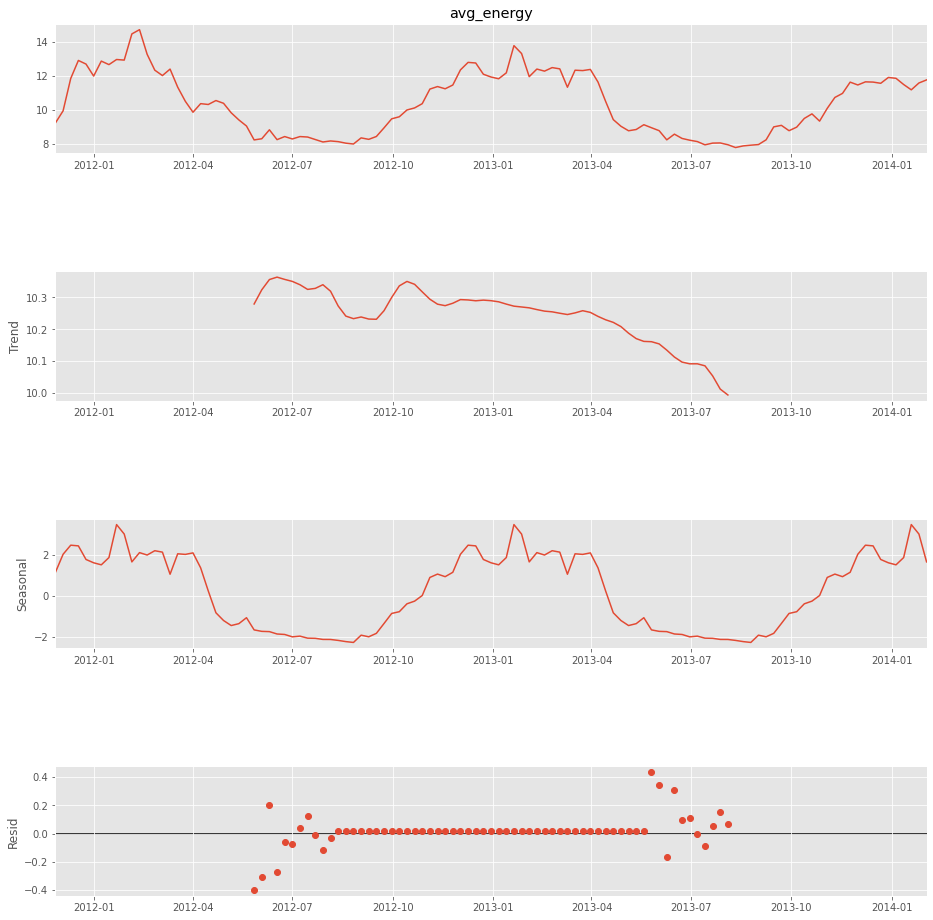

In [119]:
seas_d=sm.tsa.seasonal_decompose(train['avg_energy'],model="additive",freq=52)
fig=seas_d.plot()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [120]:
X_train=train.drop("avg_energy", axis=1)
y_train=train["avg_energy"]
X_test=test.drop("avg_energy", axis=1)
y_test=test["avg_energy"]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((115, 22), (4, 22), (115,), (4,))

In [121]:
model = auto_arima(y_train, exogenous=X_train, start_p=1, start_q=1, max_p=3, max_q=3, m=52,
                    seasonal=True,trace=True, error_action='ignore', suppress_warnings=True,
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=127.090, Time=19.88 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=180.478, Time=0.31 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=119.379, Time=17.96 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=142.424, Time=16.11 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=610.146, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=121.701, Time=0.63 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=136.412, Time=73.13 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=125.701, Time=18.88 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=123.701, Time=15.31 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=127.701, Time=76.97 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=179.116, Time=8.41 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=121.311, Time=18.83 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=120.947, Time=18.56 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=138.473, Time=17.60 sec
 ARIMA(2,0,1)(1,0,0)[52

In [122]:
model.aic()

116.79482713886179

In [123]:
model_order = model.order
model_seasonal_order = model.seasonal_order

In [124]:
model_sarimax = sm.tsa.statespace.SARIMAX(endog = y_train,order=model_order,
                                          seasonal_order=model_seasonal_order, 
                                          exog = X_train,enforce_stationarity=False, 
                                          enforce_invertibility=False)

In [125]:
model_fit = model_sarimax.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [126]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         avg_energy   No. Observations:                  115
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 52)   Log Likelihood                  -6.694
Date:                            Mon, 08 Feb 2021   AIC                             63.389
Time:                                    15:02:19   BIC                            116.567
Sample:                                11-27-2011   HQIC                            84.268
                                     - 02-02-2014                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
temperatureMax             -1.0860      0.460     -2.362      0.018      -1.987      -0.185
windBearing                 0.0011      0.001      1.048      0.295      -0.001       0.003
dewPoint                   -0.2012      0.316     -0.636      0.525      -0.821       0.418
cloudCover                 -1.0480      1.270     -0.825      0.409      -3.537       1.441
windSpeed                  -0.0382      0.113     -0.339      0.734      -0.259       0.183
pressure                    0.0098      0.008      1.290      0.197      -0.005       0.025
apparentTemperatureHigh    -0.9453      0.333     -2.836      0.005      -1.599      -0.292
visibility                 -0.0002      0.091     -0.002      0.998      -0.178       0.177
humidity                    3.8370      6.641      0.578      0.563      -9.178      16.852
apparentTemperatureLow      0.0573      0.247      0.232      0.817      -0.427       0.542
apparentTemperatureMax      0.7310      0.285      2.564      0.010       0.172       1.290
uvIndex                    -0.2020      0.141     -1.431      0.152      -0.479       0.075
temperatureLow              0.0801      0.336      0.239      0.811      -0.578       0.738
temperatureMin              0.1639      0.292      0.561      0.575      -0.409       0.737
temperatureHigh             1.2355      0.545      2.268      0.023       0.168       2.303
apparentTemperatureMin     -0.1142      0.262     -0.436      0.663      -0.628       0.399
moonPhase                   0.0566      0.355      0.160      0.873      -0.638       0.752
holiday                    -0.2521      1.114     -0.226      0.821      -2.435       1.931
housecount                 -0.0010      0.001     -1.312      0.189      -0.002       0.000
TotEnergyPerDay          7.624e-05   4.66e-05      1.636      0.102   -1.51e-05       0.000
month                      -0.0440      0.032     -1.391      0.164      -0.106       0.018
date                       -0.0050      0.007     -0.757      0.449      -0.018       0.008
ar.L1                       0.6062      0.203      2.990      0.003       0.209       1.004
ar.S.L52                   -0.1726      0.192     -0.897      0.370      -0.550       0.204
sigma2                      0.0836      0.030      2.792      0.005       0.025       0.142
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.55   Prob(JB):                         0.89
Heteroskedasticity (H):               0.29   Skew:                             0.07
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the

In [127]:
y_test_pred_sarimax = model_fit.predict(start=min(X_test.index.date), end=max(X_test.index.date),exog = X_test)
y_test_pred_sarimax.head()

2014-02-09    11.988884
2014-02-16    11.781465
2014-02-23    10.976270
2014-03-02     9.864929
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [128]:
#out_df_final["sarimax"] = y_test_pred_sarimax

In [129]:
forecast=model_fit.forecast(steps='2014-03-02', exog=X_test)

## r2 score for train and test dataset

In [130]:
r2_score(y_test, y_test_pred_sarimax)

0.5795850361944811

## Mean Squared Error

In [131]:
testScore = mean_squared_error(y_test, y_test_pred_sarimax)
print('Test Score: %.2f MSE' % (testScore))

Test Score: 0.72 MSE


In [132]:
testScore = mean_absolute_error(y_test, y_test_pred_sarimax)
print('Test Score: %.2f MAE' % (testScore))

Test Score: 0.64 MAE


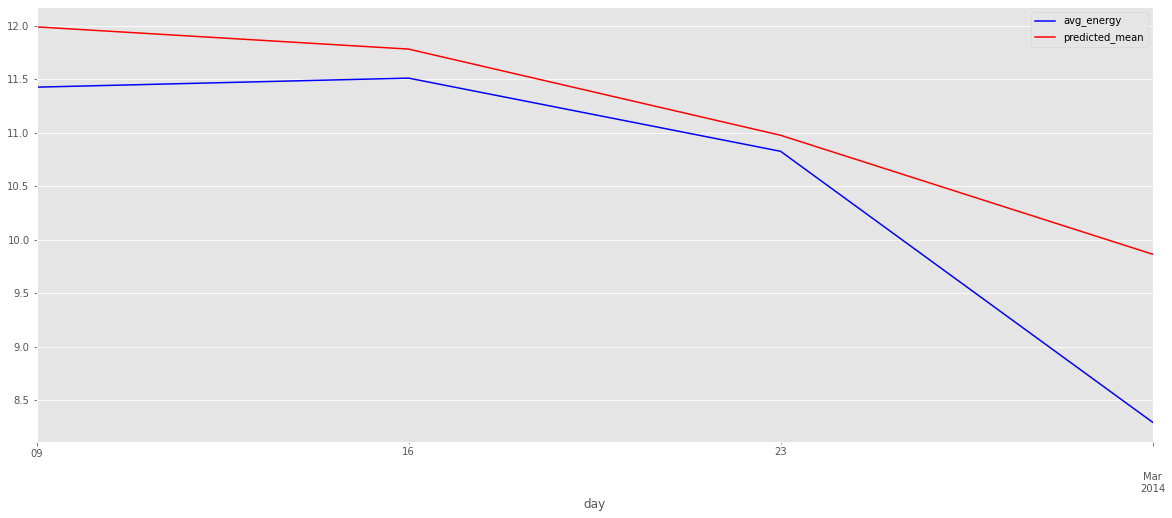

In [133]:
y_test.plot(figsize=(20,8), legend=True, color='blue')
y_test_pred_sarimax.plot(legend=True, color='red', figsize=(20,8))

# MEAN OF ALL OUTPUT

In [134]:
out_df.head()

,linear,svm,random,rnn,xg,grad
day,,,,,,
2014-02-01,11.884554,11.819605,12.197435,12.385720,11.961489,12.312100
2014-02-02,11.804018,11.610376,12.011643,12.142772,11.702682,13.009120
2014-02-03,12.087043,11.816610,12.186733,12.186736,11.961489,11.664676
2014-02-04,12.031772,11.801149,12.352549,12.166392,11.949944,12.849155
2014-02-05,11.889666,11.738828,12.128656,12.321211,11.972795,12.470203


In [135]:
out_df.reset_index("day", inplace=True)

In [136]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     28 non-null     datetime64[ns]
 1   linear  28 non-null     float64       
 2   svm     28 non-null     float64       
 3   random  28 non-null     float64       
 4   rnn     28 non-null     float32       
 5   xg      28 non-null     float32       
 6   grad    28 non-null     float64       
dtypes: datetime64[ns](1), float32(2), float64(4)
memory usage: 1.4 KB


In [137]:
def final_output(df):
    y_out_pred = df.mean(axis=1)
    return y_out_pred

y_out_pred = final_output(out_df[["rnn", "xg", "grad", "random", "linear", "svm"]])
y_out_pred.head()

0    12.093484
1    12.046769
2    11.983881
3    12.191827
4    12.086893
dtype: float64

In [138]:
test = pd.read_csv("test.csv")
y_test = test["avg_energy"]

In [139]:
y_test.shape, y_out_pred.shape

((28,), (28,))

In [140]:
accuracy_function(y_test, y_out_pred)

0.5357142857142857

### Mean Squared Error

In [141]:
testScore = mean_squared_error(y_test, y_out_pred)
print('Test Score: %.2f MSE' % (testScore))

Test Score: 5.51 MSE


### Mean Absolute Error

In [142]:
testScore = mean_absolute_error(y_test, y_out_pred)
print('Test Score: %.2f MSE' % (testScore))

Test Score: 1.03 MSE


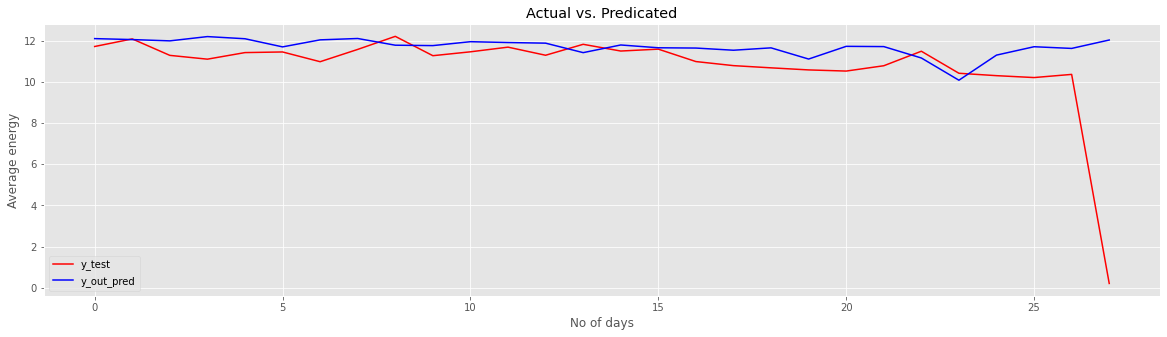

In [143]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_out_pred, color="blue")
ax2.legend(("y_test", "y_out_pred"))
ax2.set(title='Actual vs. Predicated', xlabel='No of days', ylabel='Average energy')
#ax2.tick_params(rotation=45)
plt.show()

# **Using fbprophet**

In [188]:
! pip install fbprophet

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot
from fbprophet.plot import plot_components
from sklearn.model_selection import train_test_split

In [190]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test["day"] = pd.to_datetime(test["day"])
train["day"] = pd.to_datetime(train["day"])
train_df = train[["day", "avg_energy"]]
train_df.columns = ["ds", "y"]
test_df = test[["day", "avg_energy"]]
test_df.columns = ["ds", "y"]
test_df_ans = test_df.copy()
test_df["y"] = 0

# make model with Prophet by Facebook

In [191]:
train_df.shape, test_df.shape, test_df_ans.shape

((798, 2), (28, 2), (28, 2))

In [192]:
fb_model = Prophet()
fb_model.add_seasonality(name="monthly", period=180, fourier_order=5)
fb_model.add_country_holidays(country_name='UK')
fb_model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [193]:
fb_model.train_holiday_names

0                                      New Year's Day
1                           New Year's Day (Observed)
2                         New Year Holiday [Scotland]
3              New Year Holiday [Scotland] (Observed)
4                St. Patrick's Day [Northern Ireland]
5              Battle of the Boyne [Northern Ireland]
6                      Summer Bank Holiday [Scotland]
7                         St. Andrew's Day [Scotland]
8                                       Christmas Day
9                            Christmas Day (Observed)
10                                        Good Friday
11                             Easter Monday [England
12                                              Wales
13                                  Northern Ireland]
14                                            May Day
15                                Spring Bank Holiday
16                  Late Summer Bank Holiday [England
17                                         Boxing Day
18                   Wedding

In [194]:
forecast = fb_model.predict(test_df)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Battle of the Boyne [Northern Ireland],Battle of the Boyne [Northern Ireland]_lower,Battle of the Boyne [Northern Ireland]_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,Christmas Day (Observed)_upper,Diamond Jubilee of Elizabeth II,Diamond Jubilee of Elizabeth II_lower,Diamond Jubilee of Elizabeth II_upper,Easter Monday [England,Easter Monday [England_lower,Easter Monday [England_upper,Good Friday,Good Friday_lower,Good Friday_upper,Late Summer Bank Holiday [England,Late Summer Bank Holiday [England_lower,Late Summer Bank Holiday [England_upper,May Day,May Day_lower,May Day_upper,New Year Holiday [Scotland],New Year Holiday [Scotland]_lower,New Year Holiday [Scotland]_upper,New Year Holiday [Scotland] (Observed),New Year Holiday [Scotland] (Observed)_lower,New Year Holiday [Scotland] (Observed)_upper,New Year's Day,...,Spring Bank Holiday,Spring Bank Holiday_lower,Spring Bank Holiday_upper,St. Andrew's Day [Scotland],St. Andrew's Day [Scotland]_lower,St. Andrew's Day [Scotland]_upper,St. Patrick's Day [Northern Ireland],St. Patrick's Day [Northern Ireland]_lower,St. Patrick's Day [Northern Ireland]_upper,St. Patrick's Day [Northern Ireland] (Observed),St. Patrick's Day [Northern Ireland] (Observed)_lower,St. Patrick's Day [Northern Ireland] (Observed)_upper,Summer Bank Holiday [Scotland],Summer Bank Holiday [Scotland]_lower,Summer Bank Holiday [Scotland]_upper,Wales,Wales_lower,Wales_upper,Wedding of William and Catherine,Wedding of William and Catherine_lower,Wedding of William and Catherine_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-02-01,9.477606,10.919669,12.242911,9.477606,9.477606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.100470,2.100470,2.100470,0.0,0.0,0.0,-1.614569,-1.614569,-1.614569,0.126150,0.126150,0.126150,3.588889,3.588889,3.588889,0.0,0.0,0.0,11.578076
1,2014-02-02,9.473835,11.414625,12.681123,9.473835,9.473835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.582883,2.582883,2.582883,0.0,0.0,0.0,-1.758244,-1.758244,-1.758244,0.623713,0.623713,0.623713,3.717414,3.717414,3.717414,0.0,0.0,0.0,12.056718
2,2014-02-03,9.470063,10.736282,12.029362,9.470063,9.470063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.918947,1.918947,1.918947,0.0,0.0,0.0,-1.898700,-1.898700,-1.898700,-0.025496,-0.025496,-0.025496,3.843143,3.843143,3.843143,0.0,0.0,0.0,11.389010
3,2014-02-04,9.466291,10.570168,11.879668,9.466291,9.466291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.776091,1.776091,1.776091,0.0,0.0,0.0,-2.035308,-2.035308,-2.035308,-0.154364,-0.154364,-0.154364,3.965764,3.965764,3.965764,0.0,0.0,0.0,11.242382
4,2014-02-05,9.462519,10.511719,11.835883,9.462519,9.462519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.713407,1.713407,1.7

In [195]:
out_df_final["fbprophet"] = forecast["yhat"]

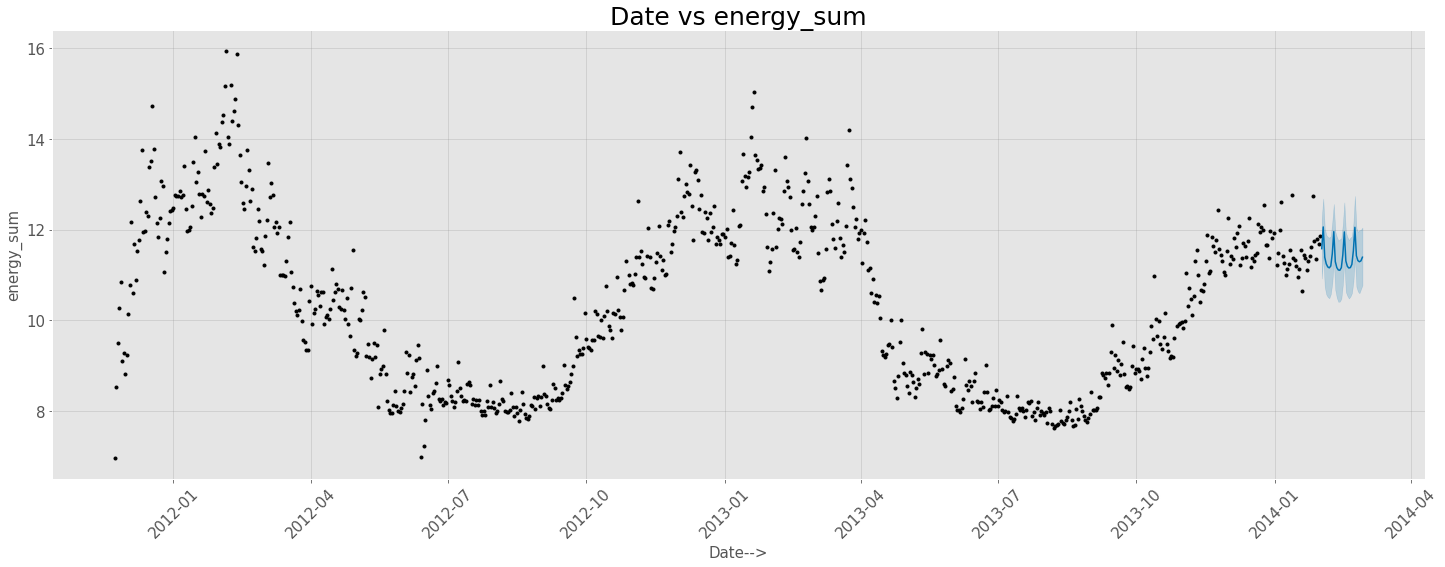

In [196]:
fig = plot(fb_model, forecast, figsize=(20, 7))
ax = fig.gca()
ax.set_title("Date vs energy_sum", size=25)
ax.set_xlabel("Date-->", size=15)
ax.set_ylabel("energy_sum", size=15)
ax.tick_params(axis="x", labelsize=15, rotation=45)
ax.tick_params(axis="y", labelsize=15)

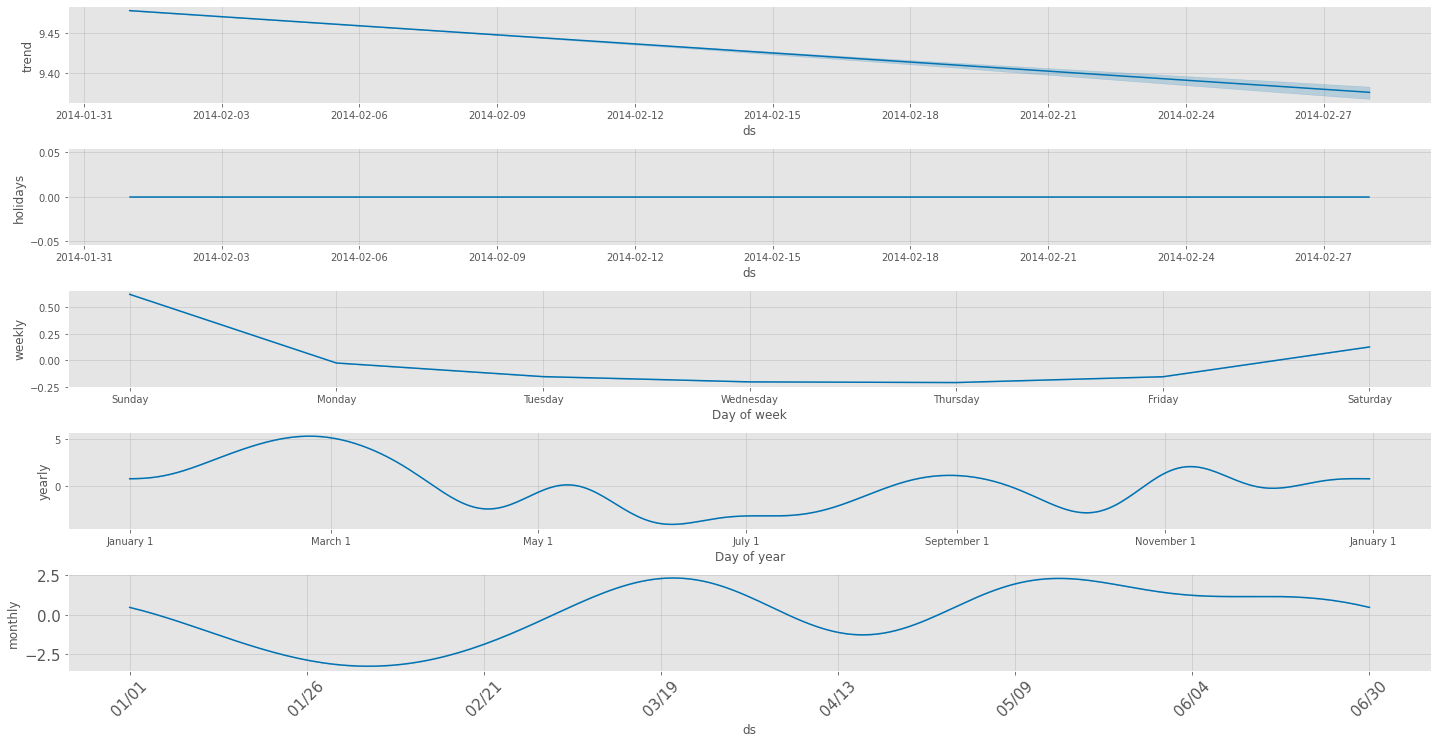

In [197]:
fig = plot_components(fb_model, forecast, figsize=(20, 10))
ax = fig.gca()
ax.tick_params(axis="x", labelsize=15, rotation=45)
ax.tick_params(axis="y", labelsize=15)

### Anlysis with cross_validation

In [198]:
df_cv = cross_validation(fb_model, horizon="60 days")
df_cv.head()

INFO:fbprophet:Making 13 forecasts with cutoffs between 2012-12-07 00:00:00 and 2013-12-02 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-12-08,13.322039,12.848318,13.820068,12.786987,2012-12-07
1,2012-12-09,13.982923,13.459887,14.505406,13.418991,2012-12-07
2,2012-12-10,13.230047,12.752962,13.769784,12.528336,2012-12-07
3,2012-12-11,13.063890,12.555674,13.598810,11.774059,2012-12-07
4,2012-12-12,12.923484,12.438770,13.418898,13.263261,2012-12-07


In [199]:
df_cv.shape

(776, 6)

### With performance_metrics, we can visualize the score

In [200]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,0.578170,0.760375,0.588942,0.058245,0.043510,0.665335
1,7 days,0.718653,0.847734,0.664693,0.065464,0.048009,0.626374
2,8 days,0.833918,0.913191,0.714695,0.070247,0.055569,0.575425
3,9 days,0.934997,0.966953,0.770376,0.075972,0.063051,0.512488
4,10 days,1.060387,1.029751,0.826991,0.081843,0.069319,0.472527


In [201]:
forecast["ds"].shape, forecast["yhat"].shape

((28,), (28,))

(array([735265., 735269., 735273., 735277., 735281., 735285., 735289.,
        735293.]), <a list of 8 Text major ticklabel objects>)

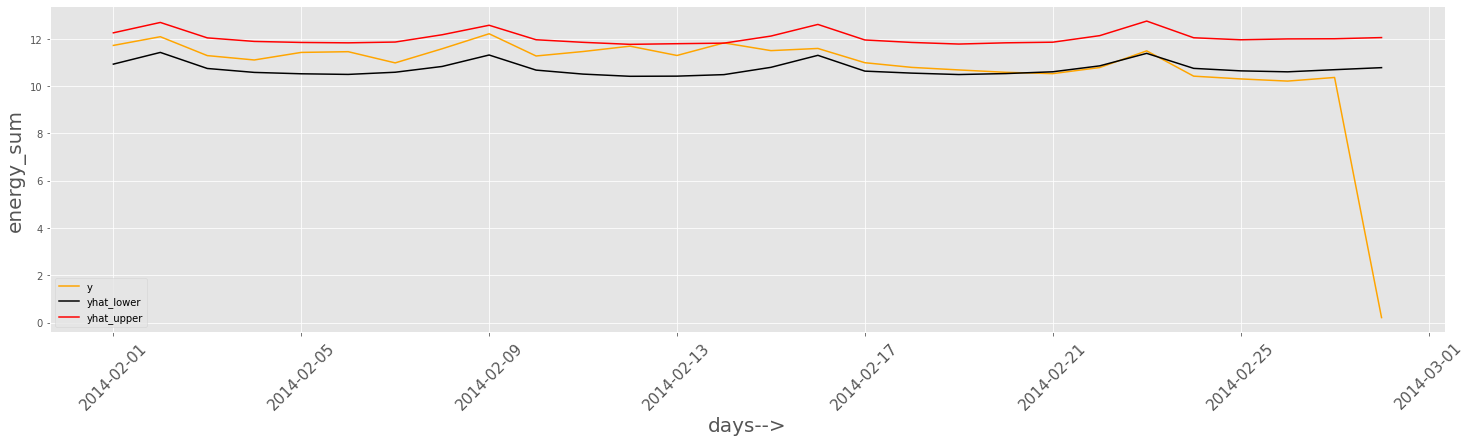

In [202]:
fig, ax1 = plt.subplots(figsize=(25, 6)) 
ax1.plot(test_df_ans["ds"], test_df_ans["y"], color="orange")
#ax1.plot(forecast["ds"], forecast["yhat"], color="blue")
ax1.plot(forecast["ds"], forecast["yhat_lower"], color="black")
ax1.plot(forecast["ds"], forecast["yhat_upper"], color="red")
ax1.legend(("y", "yhat_lower", "yhat_upper"))
ax1.set_xlabel("days-->", fontsize=20)
ax1.set_ylabel("energy_sum", fontsize=20)
plt.xticks(rotation=45, fontsize=15)

## Future Prediction for next 2 years

In [203]:
future_2yr = fb_model.make_future_dataframe(periods=730)
future_2yr.tail()

,ds
1523,2016-01-27
1524,2016-01-28
1525,2016-01-29
1526,2016-01-30
1527,2016-01-31


In [204]:
forecast_2yr = fb_model.predict(future_2yr)
forecast_2yr.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Battle of the Boyne [Northern Ireland],Battle of the Boyne [Northern Ireland]_lower,Battle of the Boyne [Northern Ireland]_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,Christmas Day (Observed)_upper,Diamond Jubilee of Elizabeth II,Diamond Jubilee of Elizabeth II_lower,Diamond Jubilee of Elizabeth II_upper,Easter Monday [England,Easter Monday [England_lower,Easter Monday [England_upper,Good Friday,Good Friday_lower,Good Friday_upper,Late Summer Bank Holiday [England,Late Summer Bank Holiday [England_lower,Late Summer Bank Holiday [England_upper,May Day,May Day_lower,May Day_upper,New Year Holiday [Scotland],New Year Holiday [Scotland]_lower,New Year Holiday [Scotland]_upper,New Year Holiday [Scotland] (Observed),New Year Holiday [Scotland] (Observed)_lower,New Year Holiday [Scotland] (Observed)_upper,New Year's Day,...,Spring Bank Holiday,Spring Bank Holiday_lower,Spring Bank Holiday_upper,St. Andrew's Day [Scotland],St. Andrew's Day [Scotland]_lower,St. Andrew's Day [Scotland]_upper,St. Patrick's Day [Northern Ireland],St. Patrick's Day [Northern Ireland]_lower,St. Patrick's Day [Northern Ireland]_upper,St. Patrick's Day [Northern Ireland] (Observed),St. Patrick's Day [Northern Ireland] (Observed)_lower,St. Patrick's Day [Northern Ireland] (Observed)_upper,Summer Bank Holiday [Scotland],Summer Bank Holiday [Scotland]_lower,Summer Bank Holiday [Scotland]_upper,Wales,Wales_lower,Wales_upper,Wedding of William and Catherine,Wedding of William and Catherine_lower,Wedding of William and Catherine_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-11-23,9.826901,8.902706,10.175460,9.826901,9.826901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.323971,-0.323971,-0.323971,0.0,0.0,0.0,-0.633517,-0.633517,-0.633517,-0.204104,-0.204104,-0.204104,0.513650,0.513650,0.513650,0.0,0.0,0.0,9.502930
1,2011-11-24,9.833804,8.918229,10.139312,9.833804,9.833804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.296349,-0.296349,-0.296349,0.0,0.0,0.0,-0.465021,-0.465021,-0.465021,-0.210330,-0.210330,-0.210330,0.379002,0.379002,0.379002,0.0,0.0,0.0,9.537455
2,2011-11-25,9.840707,8.992146,10.260078,9.840707,9.840707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.185636,-0.185636,-0.185636,0.0,0.0,0.0,-0.284164,-0.284164,-0.284164,-0.155569,-0.155569,-0.155569,0.254097,0.254097,0.254097,0.0,0.0,0.0,9.655071
3,2011-11-26,9.847610,9.386146,10.702573,9.847610,9.847610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.173272,0.173272,0.173272,0.0,0.0,0.0,-0.093564,-0.093564,-0.093564,0.126150,0.126150,0.126150,0.140685,0.140685,0.140685,0.0,0.0,0.0,10.020882
4,2011-11-27,9.854513,9.976951,11.263771,9.854513,9.854513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.768001,0.768001

In [205]:
forecast_2yr.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Battle of the Boyne [Northern Ireland],Battle of the Boyne [Northern Ireland]_lower,Battle of the Boyne [Northern Ireland]_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,Christmas Day (Observed)_upper,Diamond Jubilee of Elizabeth II,Diamond Jubilee of Elizabeth II_lower,Diamond Jubilee of Elizabeth II_upper,Easter Monday [England,Easter Monday [England_lower,Easter Monday [England_upper,Good Friday,Good Friday_lower,Good Friday_upper,Late Summer Bank Holiday [England,Late Summer Bank Holiday [England_lower,Late Summer Bank Holiday [England_upper,May Day,May Day_lower,May Day_upper,New Year Holiday [Scotland],New Year Holiday [Scotland]_lower,New Year Holiday [Scotland]_upper,New Year Holiday [Scotland] (Observed),New Year Holiday [Scotland] (Observed)_lower,New Year Holiday [Scotland] (Observed)_upper,New Year's Day,...,Spring Bank Holiday,Spring Bank Holiday_lower,Spring Bank Holiday_upper,St. Andrew's Day [Scotland],St. Andrew's Day [Scotland]_lower,St. Andrew's Day [Scotland]_upper,St. Patrick's Day [Northern Ireland],St. Patrick's Day [Northern Ireland]_lower,St. Patrick's Day [Northern Ireland]_upper,St. Patrick's Day [Northern Ireland] (Observed),St. Patrick's Day [Northern Ireland] (Observed)_lower,St. Patrick's Day [Northern Ireland] (Observed)_upper,Summer Bank Holiday [Scotland],Summer Bank Holiday [Scotland]_lower,Summer Bank Holiday [Scotland]_upper,Wales,Wales_lower,Wales_upper,Wedding of William and Catherine,Wedding of William and Catherine_lower,Wedding of William and Catherine_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1523,2016-01-27,6.743017,5.528490,8.762517,5.309592,8.282372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349145,0.349145,0.349145,0.0,0.0,0.0,-2.294577,-2.294577,-2.294577,-0.204104,-0.204104,-0.204104,2.847826,2.847826,2.847826,0.0,0.0,0.0,7.092162
1524,2016-01-28,6.739245,5.418995,8.715845,5.303098,8.282123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.358801,0.358801,0.358801,0.0,0.0,0.0,-2.416099,-2.416099,-2.416099,-0.210330,-0.210330,-0.210330,2.985230,2.985230,2.985230,0.0,0.0,0.0,7.098046
1525,2016-01-29,6.735473,5.489907,8.836863,5.296296,8.281873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.434888,0.434888,0.434888,0.0,0.0,0.0,-2.531497,-2.531497,-2.531497,-0.155569,-0.155569,-0.155569,3.121953,3.121953,3.121953,0.0,0.0,0.0,7.170361
1526,2016-01-30,6.731701,5.869318,9.109750,5.289494,8.281624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.743425,0.743425,0.743425,0.0,0.0,0.0,-2.640269,-2.640269,-2.640269,0.126150,0.126150,0.126150,3.257543,3.257543,3.257543,0.0,0.0,0.0,7.475126
1527,2016-01-31,6.727930,6.309907,9.718744,5.282691,8.281513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.273354,1.273354

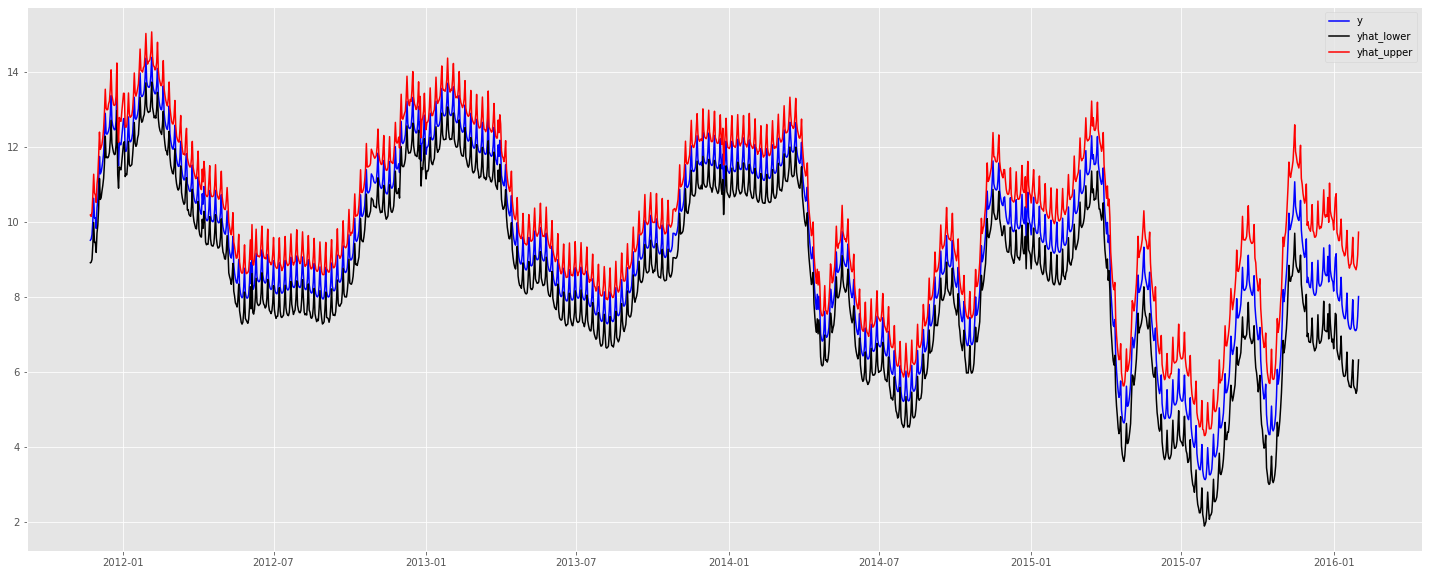

In [206]:
fig, ax1 = plt.subplots(figsize=(25, 10))
ax1.plot(forecast_2yr["ds"], forecast_2yr["yhat"], color="blue")
ax1.plot(forecast_2yr["ds"], forecast_2yr["yhat_lower"], color="black")
ax1.plot(forecast_2yr["ds"], forecast_2yr["yhat_upper"], color="red")
ax1.legend(("y", "yhat_lower", "yhat_upper"))

In [207]:
forecast_2yr_cut = forecast_2yr[['ds','yhat']]

In [208]:
forecast_2yr_cut.head()

,ds,yhat
0,2011-11-23,9.502930
1,2011-11-24,9.537455
2,2011-11-25,9.655071
3,2011-11-26,10.020882
4,2011-11-27,10.622514


In [209]:
forecast_2yr_cut.tail()

,ds,yhat
1523,2016-01-27,7.092162
1524,2016-01-28,7.098046
1525,2016-01-29,7.170361
1526,2016-01-30,7.475126
1527,2016-01-31,8.001283


In [210]:
forecast_2yr_cut_2011 = forecast_2yr_cut[forecast_2yr_cut["ds"]<"2012-11-23"]

In [211]:
forecast_2yr_cut_2011.tail()

,ds,yhat
360,2012-11-18,11.605525
361,2012-11-19,10.985748
362,2012-11-20,10.895803
363,2012-11-21,10.894391
364,2012-11-22,10.945614


In [212]:
forecast_2yr_cut_2011['yhat'].sum()  #2011-11-23 to 2012-11-22

3748.088487662713

In [214]:
forecast_2yr_cut_2012 = forecast_2yr_cut[(forecast_2yr_cut['ds'] > '2012-11-22') & (forecast_2yr_cut['ds'] < '2013-11-23')]

In [215]:
forecast_2yr_cut_2012.tail()

,ds,yhat
724,2013-11-18,11.425215
725,2013-11-19,11.344145
726,2013-11-20,11.337343
727,2013-11-21,11.369336
728,2013-11-22,11.457780


In [216]:
forecast_2yr_cut_2012.sum()  #2012-11-23 to 2013-11-22

yhat    3701.482929
dtype: float64

In [217]:
forecast_2yr_cut_2013 = forecast_2yr_cut[(forecast_2yr_cut['ds'] > '2013-11-22') & (forecast_2yr_cut['ds'] < '2014-11-23')]

In [218]:
forecast_2yr_cut_2013.tail()

,ds,yhat
1088,2014-11-18,10.903373
1089,2014-11-19,10.859122
1090,2014-11-20,10.842313
1091,2014-11-21,10.871774
1092,2014-11-22,11.115020


In [219]:
forecast_2yr_cut_2013.sum()    # 2013-11-23 to 2014-11-22

yhat    3304.028392
dtype: float64

In [220]:
forecast_2yr_cut_2014 = forecast_2yr_cut[(forecast_2yr_cut['ds'] > '2014-11-22') & (forecast_2yr_cut['ds'] < '2015-11-23')]

In [221]:
forecast_2yr_cut_2014.tail()

,ds,yhat
1453,2015-11-18,10.152760
1454,2015-11-19,10.070303
1455,2015-11-20,10.028527
1456,2015-11-21,10.196341
1457,2015-11-22,10.565749


In [222]:
forecast_2yr_cut_2014.sum()

yhat    2815.417123
dtype: float64

### We can see that the usage of energy consumption is decreasing year by year.

# MEAN OF ALL OUTPUT FINAL

In [223]:
out_df_final.head()

,day,linear,svm,random,rnn,xg,grad,fbprophet
0,2014-02-01,11.884554,11.819605,12.197435,12.385720,11.961489,12.312100,11.578076
1,2014-02-02,11.804018,11.610376,12.011643,12.142772,11.702682,13.009120,12.056718
2,2014-02-03,12.087043,11.816610,12.186733,12.186736,11.961489,11.664676,11.389010
3,2014-02-04,12.031772,11.801149,12.352549,12.166392,11.949944,12.849155,11.242382
4,2014-02-05,11.889666,11.738828,12.128656,12.321211,11.972795,12.470203,11.175926


In [225]:
out_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   day        28 non-null     datetime64[ns]
 1   linear     28 non-null     float64       
 2   svm        28 non-null     float64       
 3   random     28 non-null     float64       
 4   rnn        28 non-null     float32       
 5   xg         28 non-null     float32       
 6   grad       28 non-null     float64       
 7   fbprophet  28 non-null     float64       
dtypes: datetime64[ns](1), float32(2), float64(5)
memory usage: 1.7 KB


In [226]:
def final_all_output(df):
    y_out_pred = df.mean(axis=1)
    return y_out_pred

y_out_pred_final = final_all_output(out_df_final[["fbprophet","rnn", "xg", "grad", "random", "linear", "svm"]])
y_out_pred_final.head()

0    12.019854
1    12.048190
2    11.898900
3    12.056192
4    11.956755
dtype: float64

In [227]:
test = pd.read_csv("test.csv")
y_test_final = test["avg_energy"]

In [228]:
y_test_final.shape, y_out_pred_final.shape

((28,), (28,))

In [229]:
accuracy_function(y_test_final, y_out_pred_final)

0.5714285714285714

### Mean Squared Error

In [230]:
testScore = mean_squared_error(y_test_final, y_out_pred_final)
print('Test Score: %.2f MSE' % (testScore))

Test Score: 5.36 MSE


### Mean Absolute Error

In [231]:
testScore = mean_absolute_error(y_test_final, y_out_pred_final)
print('Test Score: %.2f MSE' % (testScore))

Test Score: 0.97 MSE


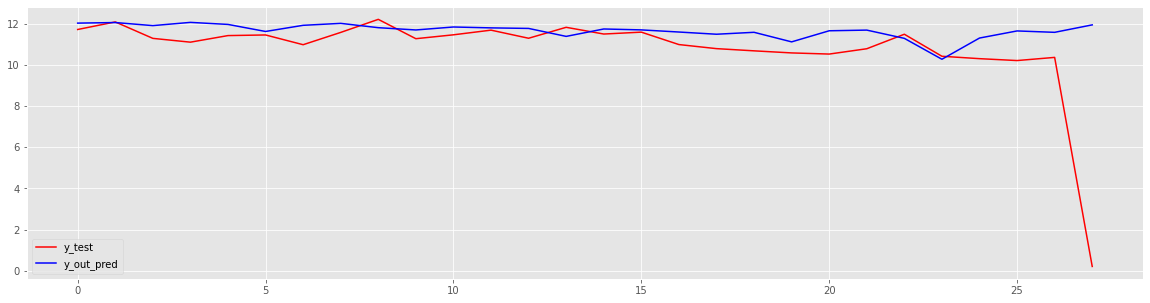

In [232]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test_final, color="red")
ax2.plot(y_out_pred_final, color="blue")
ax2.legend(("y_test", "y_out_pred"))
#ax2.tick_params(rotation=45)
plt.show()